In [32]:
## MP 573 Lecture 7: Fourier Transform in N Dimensions
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg

## Fourier Transform in Two Dimensional space

A simple case of a multi-dimensional signal is a 2D image $f(x,y)$ defined over the x-y plane.  In this instance, $u$ and $v$ are spatial frequencies in $x$ and $y$ directions, respectively, and $F(u,v)$ is the 2D spectrum of $f(x,y)$  The 2D FT enables insightful interpretations of the different 2D frequency regions. For instance the low frequency regions (close to $(u,v)=(0,0)$ represent smooth features, whereas the high frequency regions represent sharp features and edges. 
$$F(u,v) =  \int_{\mathbb{R}^2} f(x,y) e^{-i 2 \pi (xu + yv)} dx dy$$
with corresponding iFT given by:
$$f(x,y) =  \int_{\mathbb{R}^2} F(u,v) e^{i 2 \pi (xu + yv)} du dv$$


Two-dimensional Fourier transform has four different forms depending on whether the 2D signal is periodic or discrete.  In the example above, $u$ and $v$ are spatial frequencies in $x$ and $y$ directions and $F(u,v)$ is the 2D spectrum of $f(x,y)$, so the signal is aperiodic and continuous, with an aperiodic, continuous spectrum.  However, to compute the fast Fourier transform (fft) in Python, the image signal is sampled and the algorithm assumes an aperiodic, discrete signal, with a continuous, periodic spectrum.

$F(u,v)=\sum_{m=-\infty}^{\infty} \sum_{n=-\infty}^{\infty}
f[m,n]e^{-j2\pi(umx_o+vny_o)}$


$f[m,n]=\frac{1}{UV}\int_0^U \int_0^V F(u,v)
e^{j2\pi(umx_o+vny_o)} du dv$



## Physical Meaning of Fourier Transform in Two Dimensional space
The inverse transform represents the spatial function $f(x,y)$ as a linear combination of complex exponentials $e^{ i2\pi(xu+yv)}$ with complex weights $F(u,v)$. The complex weight can be represented in polar form as: $$F(u,v) = F_r(u,v)+ iF_i(u,v) = \vert F(u,v)\vert e^{iF\angle(u,v)}$$

in terms of its amplitude $\vert F(u,v)\vert$ and phase $\angle{F(u,v)}$. 

A signal $f(x,y)$ is a linear combination (integration) of infinite 2D spatial planar sinusoids $F(u,v)$ of:

**frequency**: $w=\sqrt{u^2+v^2}$  
**direction**: $\vec{n}=tan^{-1}(v/u)$  
**amplitude**: $\vert F(u,v)\vert=\sqrt{F_r(u,v)^2+F_i(u,v)^2}$   
**phase**: $\angle{F(u,v)}=tan^{-1}(F_i(u,v)/F_r(u,v))$  


By spinning the high frequency components that make up the edges of the image circle around polar coordinates, the Fourier transform acts as a filter for those high frequency locations with relatively high amplitude and phase angle compared to the rest of the smooth image.

So when you use the FFT function to measure the frequency component of a signal, you are basing the analysis on a finite set of data. The actual FFT transform assumes that it is a finite data set, a
continuous spectrum that is one period of a periodic signal. For the FFT, both the time domain
and the frequency domain are circular topologies, so the two endpoints of the time waveform
are interpreted as though they were connected together. When the measured signal is periodic
and an integer number of periods fill the acquisition time interval, the FFT turns out fine as it
matches this assumption

In [33]:
## Let's create some signals
# Blank image
n = 401
p = np.zeros ((n, n))
FOV = 40

# Create the pixel grid and simple image
y, x = np.mgrid[-40/2:40/2:(1j*n), -40/2:40/2:(1j*n)]
f = np.less(np.abs(x*x*0.3) + np.abs(y*y*0.03),1)

# Create the corresponding frequency grid
du = 2/FOV
u = du*np.linspace(1,n,n)
u = u - np.mean(u)




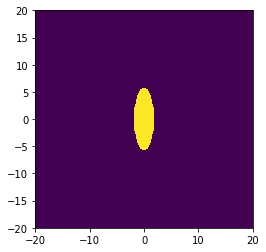

In [34]:
imgplot = plt.imshow(abs(f), extent = [-FOV/2, FOV/2, -FOV/2, FOV/2])

The value of the transform at the origin of the frequency domain, at F(0,0), is called the DC component, which in an image is always the midway point between the highest and lowest amplitudes of the images. The DC component has to be centered in Python by the numpy.fft.ffshift command. Again, note that in the simple image we create below,the edges of the circle are very sharp, high frequency areas that are difficult to express as a combination of sines and cosines, resulting in the subsequent ringing we see in k-space.

In [58]:
fhat = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f)))

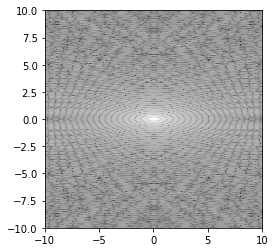

In [57]:
imgplot = plt.imshow(np.log(abs(fhat)),extent = [u[0], u[n-1], u[0], u[n-1]],cmap='gray')


The Fourier Transform of the function circle has a circular symmetry. It is composed of a central peak and a series of concentric rings of decreasing amplitudes.  The numpy. angle() function is used when we want to compute the angle of the complex argument. A complex number is represented by “x + yi” where x and y are real numbers and i= (-1)^1/2 . The angle is calculated by the formula tan-1(x/y).  In this case, we are taking the angle of F, where F =  np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(f))) 

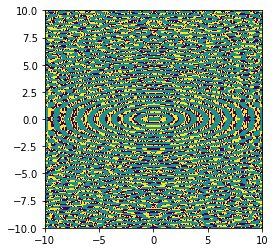

In [37]:
imgplot = plt.imshow(np.angle(fhat),extent = [u[0], u[n-1], u[0], u[n-1]])

## Understanding FFTs and Windowing

When you use the FFT to measure the frequency component of a signal, you are basing the
analysis on a finite set of data. The actual FFT transform assumes that it is a finite data set, a
continuous spectrum that is one period of a periodic signal. For the FFT, both the time domain
and the frequency domain are circular topologies, so the two endpoints of the time waveform
are interpreted as though they were connected together. When the measured signal is periodic
and an integer number of periods fill the acquisition time interval, the FFT turns out fine as it
matches this assumption.

When the number of periods in the acquisition is not an integer, the endpoints are
discontinuous. These artificial discontinuities show up in the FFT as high-frequency
components not present in the original signal. These frequencies can be much higher than the
Nyquist frequency and are aliased between 0 and half of your sampling rate. The spectrum you
get by using a FFT, therefore, is not the actual spectrum of the original signal, but a smeared
version. It appears as if energy at one frequency leaks into other frequencies. This
phenomenon is known as spectral leakage, which causes the fine spectral lines to spread into
wider signals.

In [27]:
# Load some image from file
#import h5py
#hdf5_path = 'dataset.hdf5'
#brain_dataset = h5py.File(hdf5_path, "r")
from os.path import dirname, join as pjoin
import scipy.io as sio
data_dir = pjoin('.', 'data')
mat_fname = pjoin(data_dir, 'brain_fourier.mat')
mat_contents = sio.loadmat(mat_fname)
fhat = mat_contents['dataLR']

FileNotFoundError: [Errno 2] No such file or directory: './data/brain_fourier.mat'

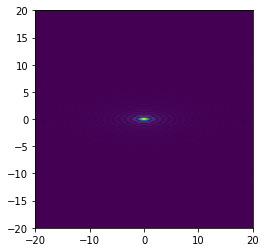

In [28]:
imgplot = plt.imshow(abs(fhat), extent = [-FOV/2, FOV/2, -FOV/2, FOV/2])

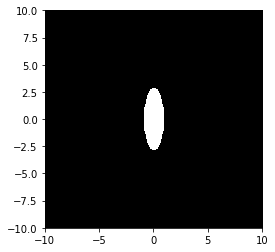

In [29]:
f = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat)))
imgplot = plt.imshow(abs(f),extent = [u[0], u[n-1], u[0], u[n-1]],cmap='gray')

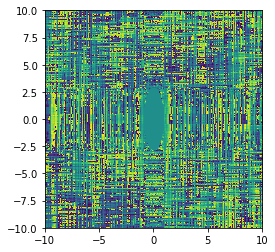

In [30]:
imgplot = plt.imshow(np.angle(f),extent = [u[0], u[n-1], u[0], u[n-1]])

In [31]:
# Now add some artifact to the data
fhat2 = fhat
#fhat2[70,60] = fhat2[70,60] + 40
sizex = len(fhat2)
sizey = len(fhat2[:])
std = 0.5
noise = np.random.normal(0,std,[sizex,sizey]) + np.random.normal(0,std,[sizex,sizey])*1j
fhat2 = fhat2 + noise

The presence of a spike (high localized signal) in the Fourier Transform of an image results in the addition of sinusoidal artifacts (sinusoids with spatial frequency given by the location of the spike in Fourier space) in the image space

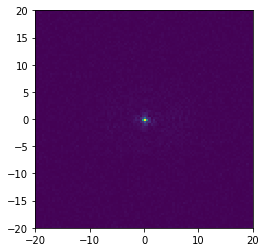

In [15]:
imgplot = plt.imshow(abs(fhat2), extent = [-FOV/2, FOV/2, -FOV/2, FOV/2])

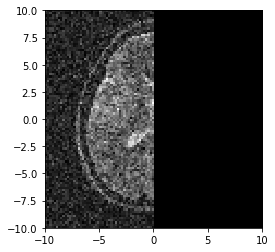

In [17]:
f2 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat2)))
imgplot = plt.imshow(abs(f2),extent = [u[0], u[n-1], u[0], u[n-1]],cmap='gray')

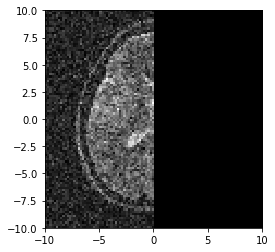

In [17]:
f2 = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(fhat2)))
imgplot = plt.imshow(abs(f2),extent = [u[0], u[n-1], u[0], u[n-1]],cmap='gray')